<div dir="rtl">



# تحلیل داده های ویروس کرونا و ارائه راه مقابله دارویی با آن توسط مدل سازی داده ها

استاد امینه امینی

محمد حسین شوندی



در این فایل  با استفاده از داده های زیستی در دیتا بیس ChEMBL یک مدل Machine learning  خواهیم ساخت</div>

<center><div dir="rtl" style="font-size:40px;"> بخش 1</div></center>

<div dir="rtl">

در این بخش ما به جمع‌آوری داده‌ها و پیش‌پردازش از پایگاه داده ChEMBL می‌پردازیم.


</div>

<div dir="rtl">

## **پایگاه داده ChEMBL**

[*پایگاه داده ChEMBL*](https://www.ebi.ac.uk/chembl/) شامل داده‌های زیست‌فعالی (bioactivity) تصحیح‌شده بیش از ۲ میلیون ترکیب است. این پایگاه داده از بیش از ۷۶,۰۰۰ سند، ۱.۲ میلیون آزمون (assay) تشکیل شده و داده‌ها شامل ۱۳,۰۰۰ هدف (targets)، ۱,۸۰۰ سلول و ۳۳,۰۰۰ نشانگر (indications) می‌باشد.  


</div>

<div dir="rtl" style="font-size:18px;">
نصب کتابخانه‌ها
</div>


<div dir="rtl" style="font-size:18px;">
web service  پایگاه داده ChEMBL را نصب کنید تا بتوانیم داده‌های زیست‌فعالی را از پایگاه داده ChEMBL بازیابی کنیم.
</div>


In [13]:
! pip install chembl_webresource_client
! pip install pandas


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<div dir="rtl" style="font-size:18px;">
وارد کردن کتابخانه‌ها
</div>


In [14]:

import pandas as pd
from chembl_webresource_client.new_client import new_client

<div dir="rtl" style="font-size:18px;">
جستجوی برای Coronavirus

</div>


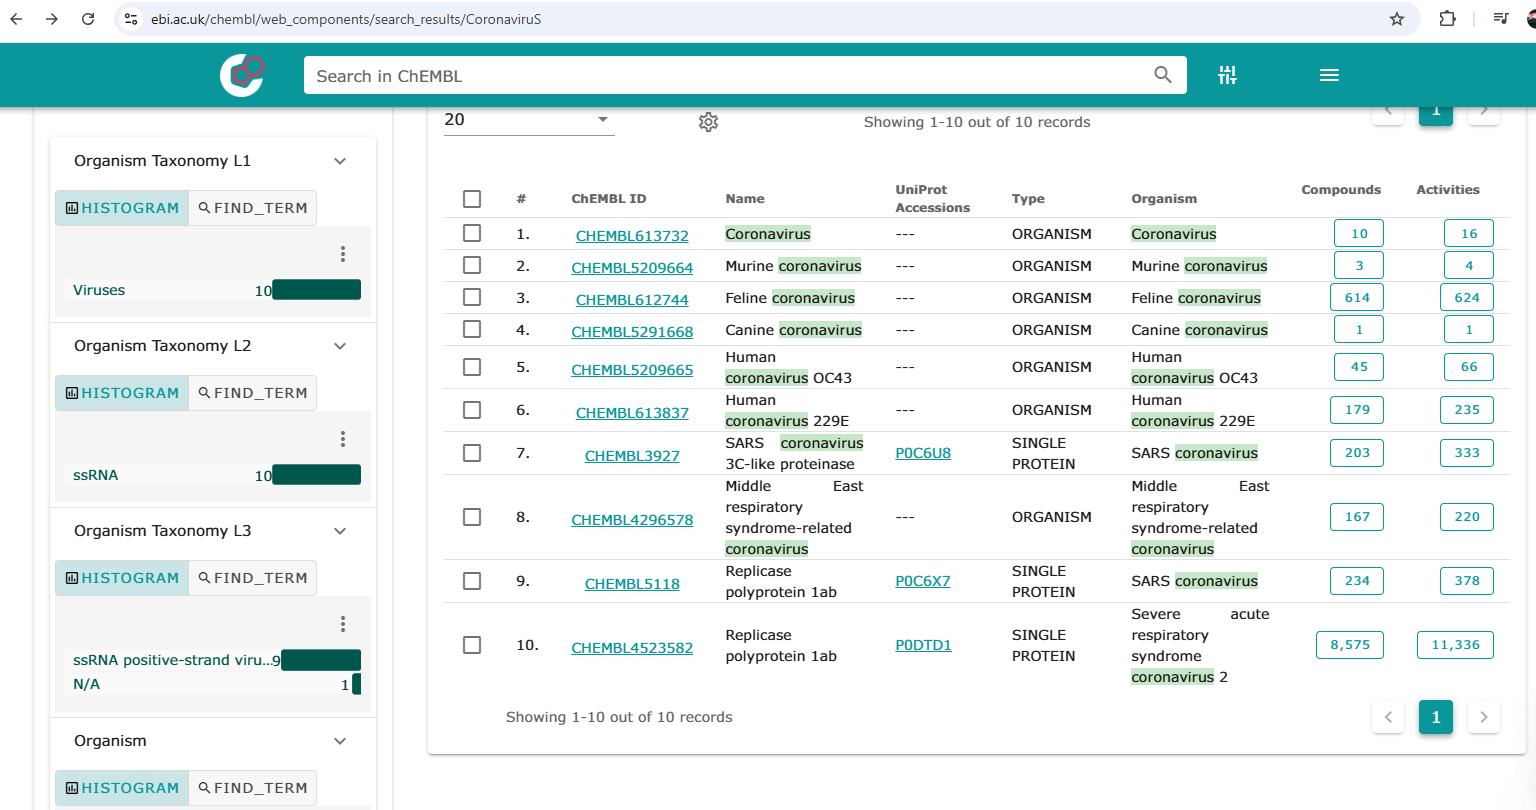

In [15]:
from IPython.display import Image, display

display(Image(filename="./PICS/CHEMBLserch.PNG", width=1000))

In [16]:

target = new_client.target
target_query = target.search('Coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


<div dir="rtl" style="font-size:18px;">
انتخاب و بازیابی داده‌های زیست‌فعالی برای پروتئیناز ۳C-مانند ویروس کرونا سارس (ورودی 7)  
ما ورودی پنجم (که مربوط به پروتئین هدف، پروتئیناز ۳C-مانند ویروس کرونا است) را به متغیر selected_target اختصاص می‌دهیم.
</div>


In [17]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

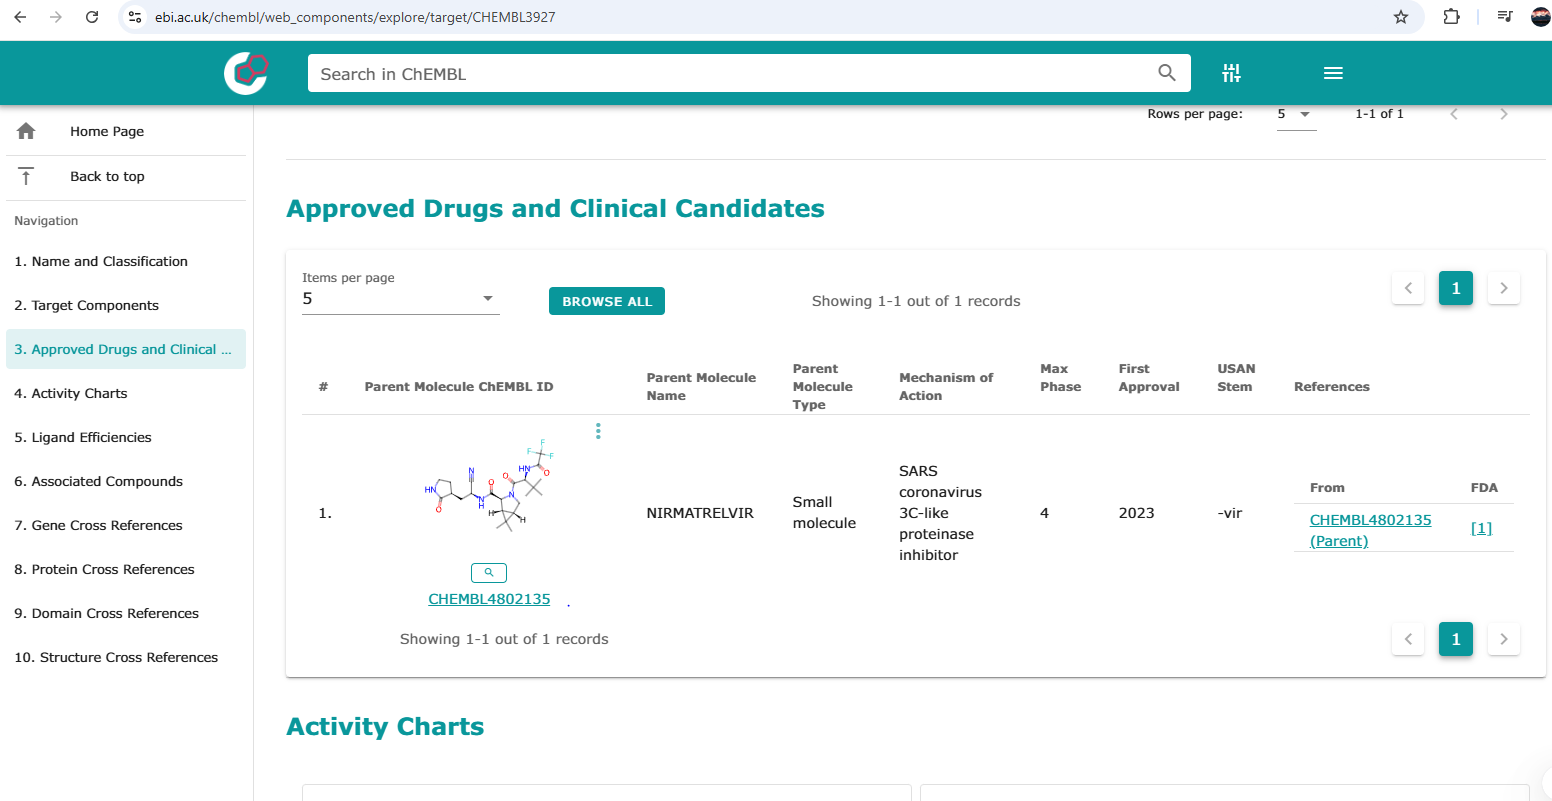

In [18]:
from IPython.display import Image, display

display(Image(filename="./PICS/CHEMBL4802135.PNG", width=1000))

<div dir="rtl" style="font-size:18px;">
در اینجا، ما تنها داده‌های زیست‌فعالی برای <i>پروتئیناز ۳C-مانند ویروس کرونا</i> (CHEMBL3927) را بازیابی خواهیم کرد که به‌عنوان مقادیر IC50 در واحد نانومولار (nM) گزارش شده‌اند.
</div>


In [19]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [20]:
df = pd.DataFrame.from_dict(res)

In [21]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


<div dir="rtl" style="font-size:18px;">
در نهایت، داده‌های زیست‌فعالی به دست آمده را در یک فایل CSV با نام <b>bioactivity_data.csv</b> ذخیره خواهیم کرد.
</div>


In [22]:
df.to_csv('./csv/bioactivity_data_raw.csv', index=False)

<div dir="rtl" style="font-size:24px;">
مدیریت داده‌های ناقص
</div>
<div dir="rtl" style="font-size:18px;">
اگر هر ترکیبی در ستون <b>standard_value</b> و <b>canonical_smiles</b> دارای مقدار ناقص باشد، آن را حذف کنید.
</div>


In [23]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


In [24]:
len(df2.canonical_smiles.unique())

86

In [25]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,None,None,12040781,[],CHEMBL2149727,Inhibition of SARS-CoV 3CLpro expressed in Esc...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,21.1
110,None,None,12040782,[],CHEMBL2149727,Inhibition of SARS-CoV 3CLpro expressed in Esc...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,226.7
111,None,None,12040783,[],CHEMBL2149727,Inhibition of SARS-CoV 3CLpro expressed in Esc...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,38.7
112,None,None,12040784,[],CHEMBL2149727,Inhibition of SARS-CoV 3CLpro expressed in Esc...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,14.4


<div dir="rtl" style="font-size:24px;">
پیش‌پردازش داده‌های زیست‌فعالی
</div>


<div dir="rtl" style="font-size:20px;">
ترکیب ۳ ستون (molecule_chembl_id, canonical_smiles, standard_value) و bioactivity_class در یک DataFrame
</div>


In [26]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
109,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0
110,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0
111,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0
112,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0


<div dir="rtl" style="font-size:18px;">
DataFrame را در یک فایل CSV ذخیره می‌کند
</div>


In [27]:
df3.to_csv('./csv/bioactivity_data_preprocessed.csv', index=False)

<div dir="rtl" style="font-size:20px;">
برچسب‌گذاری ترکیبات به‌عنوان فعال، غیرفعال یا حدواسط
</div>
<div dir="rtl" style="font-size:18px;">
داده‌های زیست‌فعالی در واحد IC50 هستند. ترکیباتی با مقادیر کمتر از ۱۰۰۰ نانومولار به‌عنوان <b>فعال</b> در نظر گرفته می‌شوند، در حالی که مقادیر بالاتر از ۱۰,۰۰۰ نانومولار به‌عنوان <b>غیرفعال</b> محسوب می‌شوند. مقادیر بین ۱,۰۰۰ و ۱۰,۰۰۰ نانومولار به‌عنوان <b>حدواسط</b> نام‌گذاری می‌شوند.
</div>


In [28]:
df4 = pd.read_csv('./csv/bioactivity_data_preprocessed.csv')

In [29]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [30]:
bioactivity_class = pd.Series(bioactivity_threshold, name='bioactivity_class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0,inactive
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0,inactive
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0,inactive
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0,inactive


<div dir="rtl" style="font-size:18px;">
DataFrame را در یک فایل CSVذخیره می‌کنیم
</div>


In [31]:
df5.to_csv('./csv/bioactivity_data_curated.csv', index=False)

---